In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import logging as log
import re
import random
import collections
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from algoDEN import DEN
import itertools
import time
import math

In [2]:
mnist_variation_train = pd.read_csv('./data/mnist_variation/mnist_all_background_images_rotation_normalized_train_valid.amat', delim_whitespace=True, header=None, names=[str(i) for i in range(784)] + ['label'])
mnist_variation_train_set_loader = []
for y in list(range(10)):
    mnist_variation_train_set = torch.utils.data.TensorDataset(
        torch.from_numpy(mnist_variation_train[mnist_variation_train['label'] == y].as_matrix([str(i) for i in range(784)])).float(),
        torch.from_numpy(mnist_variation_train[mnist_variation_train['label'] == y]['label'].values).float(),
    )
    mnist_variation_train_set_loader.append(torch.utils.data.DataLoader(mnist_variation_train_set, batch_size=50, shuffle=True))

In [3]:
def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [4]:
simple_net = nn.Sequential(nn.Linear(784, 312),
                           nn.ReLU(),
                           nn.Linear(312, 128),
                           nn.ReLU(),
                           nn.Linear(128, 1),
                           nn.ReLU())
den = DEN(simple_net)

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


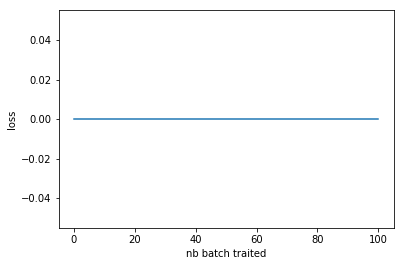

In [5]:
plt.plot(den.trainFirst(mnist_variation_train_set_loader[0]))
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()

In [6]:
losses = den.selectiveRetraining(mnist_variation_train_set_loader[1])
plt.plot(losses[0])
plt.plot(losses[1])
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 0


RuntimeError: hook 'h' has returned an incorrect number of values (got 2, but expected 3)